# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab

np.random.seed(1618)

In [9]:
df = pd.read_csv('data/human_body_temperature.csv')

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [11]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [14]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


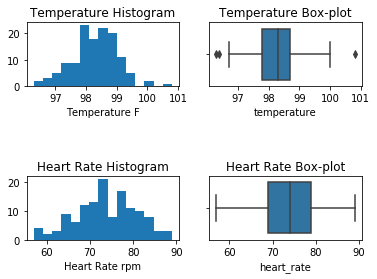

In [54]:
init_plot = plt.subplot(3,2,1)
init_plot = plt.hist(df.temperature, bins = 15)
init_plot = plt.title('Temperature Histogram')
init_plot = plt.xlabel('Temperature F')

init_plot = plt.subplot(3,2,2)
init_plot = sns.boxplot(x = 'temperature' , data=df)
init_plot = plt.title('Temperature Box-plot')

init_plot = plt.subplot(3,2,5)
init_plot = plt.hist(df.heart_rate, bins=15)
init_plot = plt.title('Heart Rate Histogram')
init_plot = plt.xlabel('Heart Rate rpm')

init_plot = plt.subplot(3,2,6)
init_plot = sns.boxplot(x = 'heart_rate', data = df)
init_plot = plt.title('Heart Rate Box-plot')

plt.show()

In [60]:
#Although histogram is has a bell shape there is at least positive skewness and proper normality test should be done.
#Shapira-Wilk Normality test is choosen for this and it has a built in function in scipy/stats library.
#Test has 95% confidence interval and returns W test statistic and p-value for hypothesis testing.
#Null hypothesis is "Data has normal distibution" 

norm_test = stats.shapiro(df.temperature)

print(' Human body temperature data is normally distributed. Shapiro - Wilk Normality test with 0.05 alpha level indicates that', norm_test[1], "p-value which can't reject the null hypothesis, with" , norm_test[0], 'test statistic')

 Human body temperature data is normally distributed. Shapiro - Wilk Normality test with 0.05 alpha level indicates that 0.2331680953502655 p-value which can't reject the null hypothesis, with 0.9865769743919373 test statistic


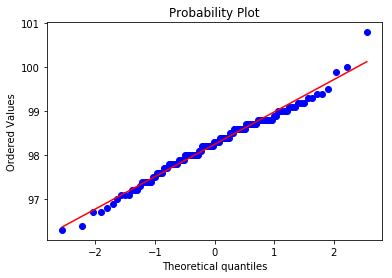

In [64]:
# Also Q_Q plot is another way of testing the normality

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

Q2 - Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

Classical statistics theory, researches suggests that Central Limit's large enough sample size is 30.(ie. Hogg and Tanis Probability and Statistical Inference) The number is highly dependent on the variables that will be used during analyses but as a rule of thumb CLT, good enough sample size is 30. Since we have 130 observations, our sample size is big enough.

Q3- 
Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

In [66]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

H0 : Population mean is 98.6 degF
H1 : Population mean is not 98.6 degF

In [125]:
%%time

def ecdf(data):
    """ sorts the data ascending order, calculates a y axis 0 to 1"""
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

def boost(data, func, hypo=0, size=1):
    ''' bootsrap samples the data, calculates the function and replicates it'''
    boostsample = np.empty(size)
    for i in range(size):
        boostsample[i] = func(np.random.choice(data, size=len(data)))-hypo
    return boostsample

temp = df.temperature 

meantemp = np.mean(temp)
print('mean temp : ', meantemp)
stdtemp = np.std(temp)
print('std temp : ', stdtemp)


# Bootstrap Hypothesis Testing - one sample
shifted = temp - np.mean(temp) + 98.6

test = boost(shifted, np.mean, hypo=98.6, size=10000)

test_statistic = np.mean(temp) - 98.6

p = np.sum(test <= test_statistic)/10000

if p <= 0.05:
    print('H0 is rejected, mean body temperature is not equal to 98.6 and p-value is :', p)
else:
    print("H0 can't be rejected")


mean temp :  98.24923076923078
std temp :  0.7303577789050377
H0 is rejected, mean body temperature is not equal to 98.6 and p-value is : 0.0
Wall time: 452 ms


Since we are comparing one dataset with another single metric, one-sample tests are appropriate to use. Also, our sample size is 130. According to CLT, sample sizes above 30, sample standart deviation is a good enough estimator of the population standart deviation and the z-scores calculated with sample standart deviation will be normally distributed. With the sample size 130, z-score is the correct statistic to use.

In [150]:
z_score = (np.mean(temp)-98.6)/(np.std(temp)/np.sqrt(len(temp)))
print(z_score)

# t-score will be calculated exactly with the same equation, values will be same
# H0 hypotheses will be rejected according to both z-score and t-value


-5.475925202078116


Q4- Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [158]:
sample10 = np.random.choice(temp, size=10)
print(sample10)

# with the sample size 
from statsmodels.stats.weightstats import ztest

z_score, p_valz = ztest(sample10, value=98.6, alternative='two-sided')

print('z-score is : ', z_score, 'p-value is : ', p_valz)

t_score, p_valt = stats.ttest_1samp(sample10, popmean=98.6)

print('t-score is : ', t_score, 'p-value is : ', p_valt)

#z-score rejects the null hypothesis while t-score can't, but the correct statistic to use t-score so H0 can't be rejected
# this functions has a glitch, z and t scores are exactly the same, this shouldn't be the case needs additional check


[97.4 98.2 98.1 99.1 97.9 98.2 98.2 97.9 98.8 98.2]
z-score is :  -2.6832815729997095 p-value is :  0.00729035809153647
t-score is :  -2.6832815729997095 p-value is :  0.02507092187318522


Since the sample size is 10, smaller than the CLT acceptable large size which is 30. True statistic is t-score, this distribution is specifically modelled for small sample sizes and get's corrected by the degree's of freedom, since it eliminates the previous variance information about population sample. As we can see from the above calculated scores, although due to randomization at the beginning of the cell might affect the results, in most cases while z-score rejects the H0 hypothesis, t-score can't and since the true statistic is t-score, scientifically right result will be not rejecting H0.

Q5- 
At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


mean is:  98.24997238461538 var is:  0.004060410184136106 std is:  0.06372134794663485


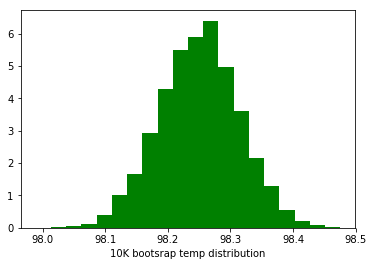

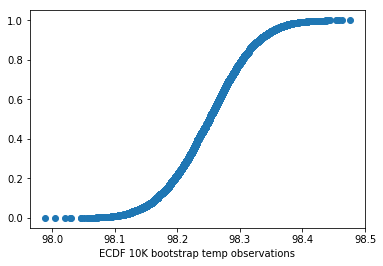

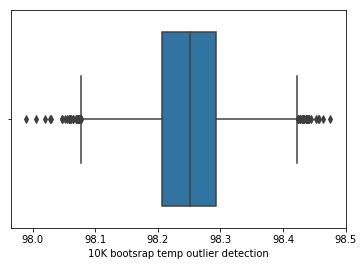

In [177]:
abnormal = boost(temp, np.mean, size=10000)
mean_abn = np.mean(abnormal)
var_abn = np.var(abnormal)
std_abn = np.std(abnormal)
print('mean is: ', mean_abn, 'var is: ', var_abn, 'std is: ', std_abn)

xab, yab = ecdf(abnormal)

j1 = plt.hist(abnormal, bins=20, color='green', density=True)
j1 = plt.xlabel('10K bootsrap temp distribution')
plt.show()
j2 = plt.plot(xab, yab, marker='o', linestyle='none')
j2 = plt.xlabel('ECDF 10K bootstrap temp observations')
plt.show()
j3 = sns.boxplot(abnormal)
j3 = plt.xlabel('10K bootsrap temp outlier detection')
plt.show()





In [236]:
#There are so many outliers in the bootsrapped data, mean value might be affected by this outliers, and also all outliers 
#can mean statistically abnormal values.

median_abn = np.median(abnormal)
print('10K bootsrap median is: ', median_abn)
quart_abn = np.percentile(abnormal, [25, 75])
print(quart_abn)
print('25th quantile is: ', quart_abn[0], '75th quanile is:', quart_abn[1])
extr_abn = np.percentile(abnormal, [2.5, 97.5])
print('95% confidence is :', extr_abn)

10K bootsrap median is:  98.25076923076925
[98.20692308 98.29307692]
25th quantile is:  98.20692307692309 75th quanile is: 98.29307692307694
95% confidence is : [98.12384615 98.37384615]


Non-normality should be defined by the health professionals and must be tested by scientists. But interms of statistical meaning 95% confidence intervals are the common acceptable level for most of the theses. In perfect normal distribution this means 2 times variance below and above mean. Without a scientific background research, 95% confidence interval can be used to identify abnormal levels of human body temperature.

Below 98.13 degF and above 98.37 degF is statistically abnormal levels of humanbody temperature.

Q6-
Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

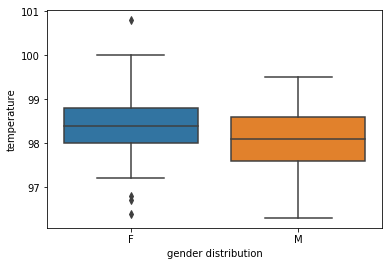

In [187]:
j4 = sns.boxplot(y=df.temperature, x=df.gender)
j4 = plt.xlabel('gender distribution')
j4 = plt.show()

In [199]:
fem_df= df[df.gender == 'F']
mal_df = df[df.gender == 'M']
fem_temp = fem_df.temperature
mal_temp = mal_df.temperature

mean_femtemp = np.mean(fem_temp)
mean_maltemp = np.mean(mal_temp)

print('Mean female body temperature is :', mean_femtemp)
print('Mean male body temperature is :', mean_maltemp)

Mean female body temperature is : 98.39384615384613
Mean male body temperature is : 98.1046153846154


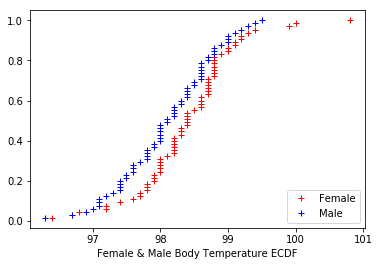

In [205]:
xf, yf = ecdf(fem_temp)
xm, ym = ecdf(mal_temp)

j5 = plt.plot(xf, yf, linestyle='none', color='red', marker='+')
j5 = plt.xlabel('Female & Male Body Temperature ECDF')
j6 = plt.plot(xm, ym, linestyle='none', color='blue', marker='+')
j6 = plt.legend(['Female', 'Male'], loc='lower right')
j6 = plt.show()

For the two sample ttest, hypotheses are:

H0 : Female and Male Body Temperature has equal means.
H1 : Female and Male BOdy Temperature doesn't have equal means.



In [209]:
#frequentist approach

t_score_gender, p_value_gender = stats.ttest_ind(fem_temp, mal_temp)
print('t-score is :', t_score_gender, 'p-value is :', p_value_gender)

if p_value_gender <= 0.05:
    print(p_value_gender,"is smaller than 0.05 selected alpha value and H0 is rejected. Female and Male body temperature doesn't have same means")
else:
    print(p_value_gender, "is not smaller than selected alpha, H0 can't be rejected.")

t-score is : 2.2854345381656103 p-value is : 0.02393188312239561
0.02393188312239561 is smaller than 0.05 selected alpha value and H0 is rejected. Female and Male body temperature doesn't have same means


In [221]:
#hacker statistics - permutation hacking 1000 boostrap sample
def boost_perm(data1, data2, size=1):
   
    perm_boost = np.empty(size)
    permutation = np.empty(size)
    
    for i in range(size):
        
        permutation = np.random.permutation(np.concatenate((data1, data2)))
        perm_samp1 = permutation[:len(data1)]
        perm_samp2 = permutation[len(data1):]
        perm_boost[i] = np.mean(perm_samp1) - np.mean(perm_samp2)

    return perm_boost

test_perm = boost_perm(fem_temp, mal_temp, size=1000)

p_perm = np.sum(test_perm>=(np.mean(fem_temp)-np.mean(mal_temp)))/len(test_perm)

if p_perm <= 0.05:
    print(p_perm,"is smaller than 0.05 selected alpha value and H0 is rejected. Female and Male body temperature doesn't have same means")
else:
    print(p_perm, "is not smaller than selected alpha, H0 can't be rejected.")





0.012 is smaller than 0.05 selected alpha value and H0 is rejected. Female and Male body temperature doesn't have same means


To compare means of the two samples, if the samples are independent and if the both datasets are available two sample independent t test is the test to be used as frequentist. Also, hacker statistics can be used, permutation test can be used since the samples are coming from the same population and the two different sub-samples we are tryinh to test is gender difference.

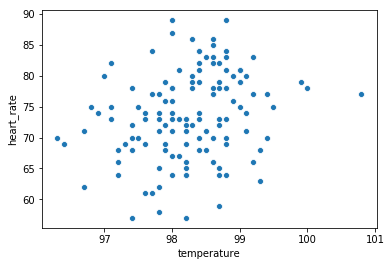

In [225]:
j7 = sns.scatterplot(df.temperature, df.heart_rate)
j7 = plt.show()

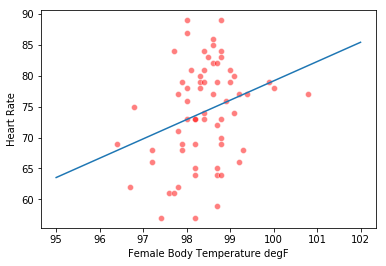

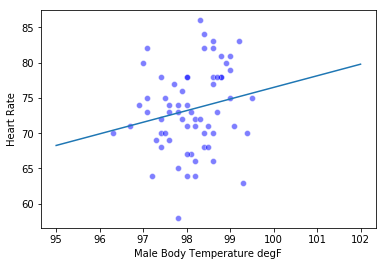

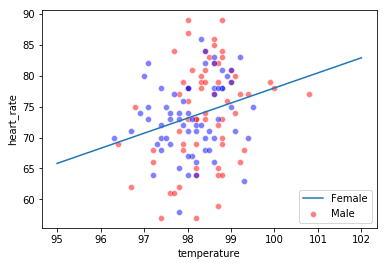

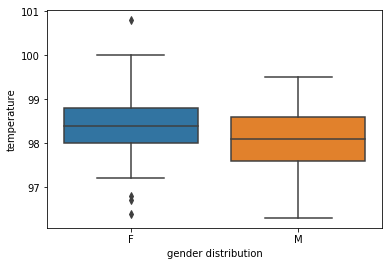

fem temp*rate corr : [[1.         0.28693115]
 [0.28693115 1.        ]]
mal temp*rate corr : [[1.         0.19558938]
 [0.19558938 1.        ]]


In [238]:
j8 = sns.scatterplot(fem_df.temperature, fem_df.heart_rate, color='red', alpha=0.5)
j8 = plt.xlabel('Female Body Temperature degF')
j8 = plt.ylabel('Heart Rate')
af, bf = np.polyfit(fem_df.temperature, fem_df.heart_rate, deg=1)
xf = np.array([95, 102])
yf = af * xf + bf
j8 = plt.plot(xf, yf)
j8 = plt.show()
j9 = sns.scatterplot(mal_df.temperature, mal_df.heart_rate, color='blue', alpha=0.5)
j9 = plt.xlabel('Male Body Temperature degF')
j9 = plt.ylabel('Heart Rate')
am, bm = np.polyfit(mal_df.temperature, mal_df.heart_rate, deg=1)
xm = np.array([95, 102])
ym = am * xm + bm
j9 = plt.plot(xm, ym)
j9 = plt.show()
j10 = sns.scatterplot(fem_df.temperature, fem_df.heart_rate, color='red', alpha=0.5)
j10 = sns.scatterplot(mal_df.temperature, mal_df.heart_rate, color='blue', alpha=0.5)
aw, bw = np.polyfit(df.temperature, df.heart_rate, deg=1)
xw = np.array([95, 102])
yw = aw * xw + bw
j10 = plt.plot(xw, yw)
j10 = plt.legend(['Female', 'Male'], loc='lower right')
j10 = plt.show()
j11 = sns.boxplot(y=df.temperature, x=df.gender)
j11 = plt.xlabel('gender distribution')
j11 = plt.show()

fem_corr = np.corrcoef(fem_df.temperature, fem_df.heart_rate)
print('fem temp*rate corr :', fem_corr)

mal_corr = np.corrcoef(mal_df.temperature, mal_df.heart_rate)
print('mal temp*rate corr :', mal_corr)

Hutchinson et al. reported that average normal human body temperature is 98.6 degF with (97.7 degF and 99.5 degF) 'Hutchison, James S.; et al. (June 2008). "Hypothermia therapy after traumatic brain injury in children". New England Journal of Medicine. 358 (23): 2447–2456.'

In our research, our data is collected from 130 different cases both men and women with different heart rate measurements. We have tested our data in two different scenarios, our research questions are:

Is average body temperature is 98.6 degF?

Is there a difference between men and women average body temperatures?

I also added some visual graphs to check is there any correlation between heart rate and body temperature in terms of gender difference.

Our data showed that mean human body temperature is STATISTICALLY different than 98.6 degF. Our one sample t-test and bootstrap test rejected our H0 hypotesis, which is mean human body temperature is 98.6 degF.

We also checked that gender differences on human body temperature, but our classical 2 independent sample t-test and bootstrap test showed that there is a STATISTICAL difference between gender's mean body temperature. 

Last graphs are showing that there are almost no correlation between idle state heart rates and body temperatures. Correlations are 0.28 in females and 0.19 in males.